In [1]:
exec(open("inc_notebook.py").read())
import logging, sys, math,os
from datetime import datetime
exec(open("classifiers/initKeras.py").read())

%matplotlib inline
dataStatsDate = datetime(2019, 11, 21)


exec(open("classifiers/incDoodleClassifier.py").read())

current working dirF:\myProjects\tfKeras\UCSC\Opensource\DoodleForPicStory


Using TensorFlow backend.


In [2]:
model = classifierFactory.create(
    template = 'BasicBN',
    outputClasses = dataStats.stats['countClasses'],
    inputShape = (28, 28, 1)
)

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          102464    
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 64)          256       
__________

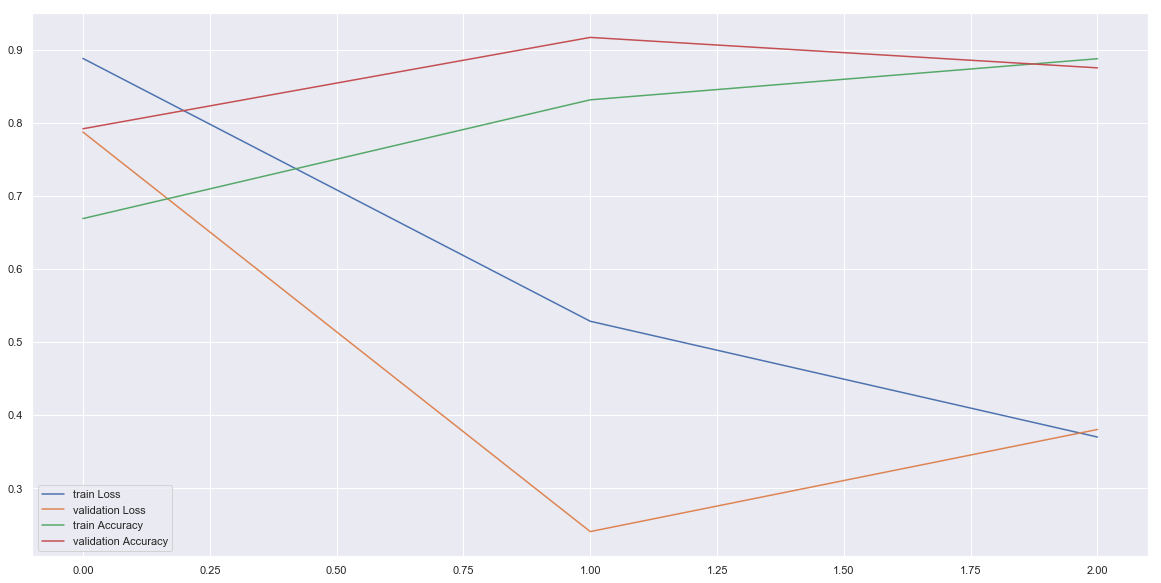

In [4]:
history = model.fit_generator( 
                    generator=trainGenerator,
                    validation_data=validationGenerator,
                    use_multiprocessing=False, 
                    workers=3, 
                    initial_epoch = 0,
                    epochs=3,
                    max_q_size = 100,
                    steps_per_epoch = trainGenerator.n_batches,
                    validation_steps = validationGenerator.n_batches,
                    callbacks = [livePlotKeras]
                   )

In [5]:
classifierIO.save(model, model.name)